In [67]:
import os, re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns

binaryBodyTitle = './experiment/binaryBodyTitle.csv'

# Lê o CSV (separado por virgula, sem a primeira coluna (PR ) e sem os textos) - tirei na mao
df = pd.read_csv(binaryBodyTitle, sep=';')

list_collumns = list(df.columns) 

list_collumns


['pr',
 'Google Common',
 'Test',
 'SO',
 'IO',
 'UI',
 'Network',
 'Security',
 'OpenOffice Documents',
 'Database',
 'Utils',
 'PDF',
 'Logging',
 'Latex',
 'Title',
 'Body',
 'prIssue',
 'issue',
 'issueTitle',
 'issueBody',
 'issueComments',
 'issueTitleLink',
 'issueBodyLink',
 'issueCommentsLink',
 'isPR',
 'isTrain',
 'commitMessage']

In [42]:
del df['pr']
del df['Title']
del df['Body']
del df['prIssue']
del df['issue']
del df['issueTitle']
del df['issueBody']
del df['issueComments']
del df['issueTitleLink']
del df['issueBodyLink']
del df['issueCommentsLink']
del df['isPR']
del df['isTrain']
del df['commitMessage']

#removing utils because we are not analzying it
del df['Utils']

#df

In [43]:

#Transforma tudo pra int pra na ter erro de cast
df = df.astype(int)
#calcula a cooorrencia, multiplica pela transposa
coOccurrence = df.T.dot(df)

#Limpa a diagonal principal
coOccurrence.values[[np.arange(coOccurrence.shape[0])]*2] = 0


/Users/igorscaliantewiese/anaconda3/envs/skills/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


In [44]:
coOccurrence

,Google Common,Test,SO,IO,UI,Network,Security,OpenOffice Documents,Database,PDF,Logging,Latex
Google Common,0,188,129,479,453,224,49,60,72,32,472,11
Test,188,0,69,426,238,246,33,42,47,30,271,13
SO,129,69,0,155,149,94,47,28,24,12,165,6
IO,479,426,155,0,811,542,57,84,95,43,925,22
UI,453,238,149,811,0,406,51,77,83,31,810,12
Network,224,246,94,542,406,0,32,83,57,34,472,17
Security,49,33,47,57,51,32,0,14,13,6,57,4
OpenOffice Documents,60,42,28,84,77,83,14,0,16,9,84,3
Database,72,47,24,95,83,57,13,16,0,14,99,8
PDF,32,30,12,43,31,34,6,9,14,0,37,3


In [63]:
coOccurrence.to_csv('coOc.csv')

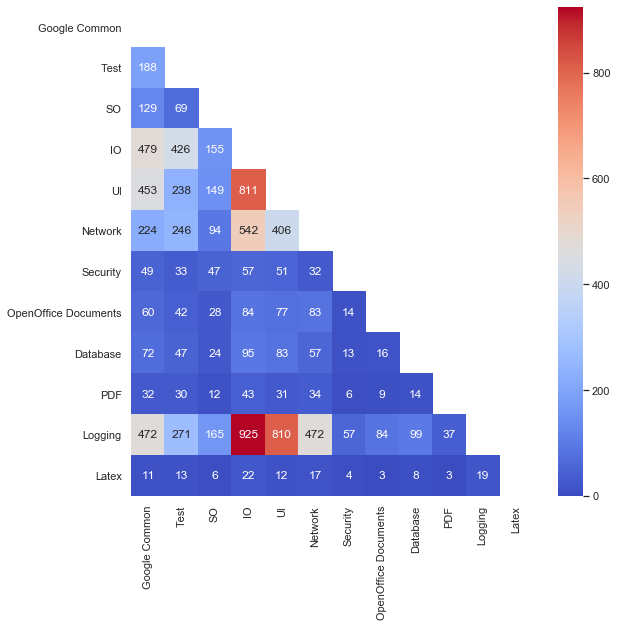

In [64]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

mask = np.zeros_like(coOccurrence, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,9))
sns.heatmap(coOccurrence,
            cmap='coolwarm',
            annot=True,
            fmt="d",
            mask = mask);

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


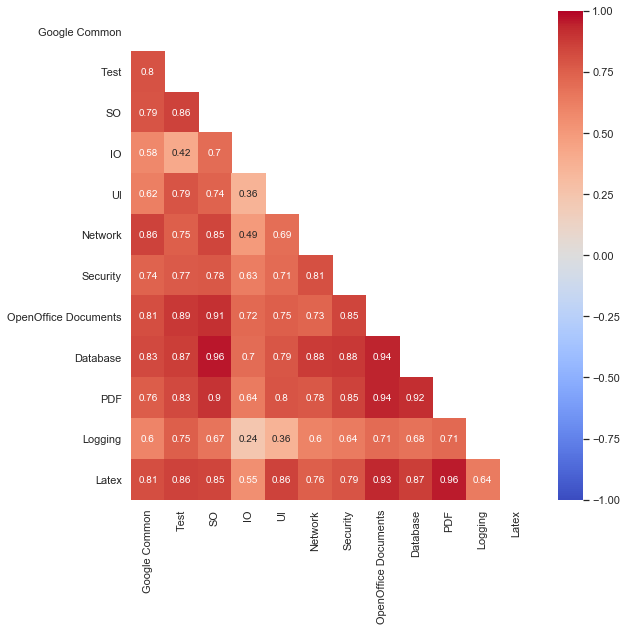

In [65]:
mask = np.zeros_like(coOccurrence.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,9))
sns.heatmap(coOccurrence.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask,
            annot_kws={"size": 10});

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [51]:
def plot_comments():

    data_classes = pd.read_csv(binaryBodyTitle, header = 0, sep=";")

    data_classes["titleBody"] = data_classes["Title"] + data_classes["Body"]
    data_classes = data_classes.drop('Title', 1)
    data_classes = data_classes.drop('Body', 1)
    
    columnsTitles = ['pr', 'titleBody','Google Common',
'Test',
'SO',
'IO',
'UI',
'Network',
'Security',
'OpenOffice Documents',
'Database',
'Utils',
'PDF',
'Logging',
'Latex']

    #reordering the dataframe collumns to facilitate the plot
    data_classes = data_classes.reindex(columns=columnsTitles)

    categories = list(data_classes.iloc[:,2:])
    sns.set(font_scale = 1)
    plt.figure(figsize=(15,8))


    ax=sns.barplot(categories, data_classes.iloc[:,2:].sum().values)
    plt.title("Comments in each category", fontsize=15)
    plt.ylabel('Number of comments', fontsize=15)
    plt.xlabel('Comment Type ', fontsize=15)
    plt.xticks(rotation=90)
    #adding the text labels
    rects = ax.patches
    labels = data_classes.iloc[:,2:].sum().values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)
    plt.show()

    return data_classes

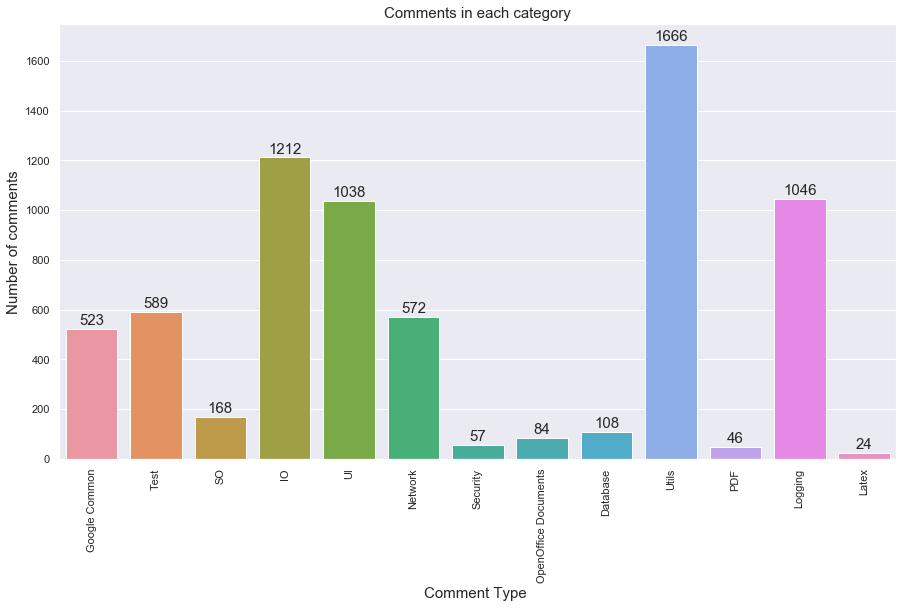

In [52]:
data_classes = plot_comments()

In [53]:
### Comments having multiple labels
def plot_multi_labels(data_classes):
    
    rowSums = data_classes.iloc[:,2:].sum(axis=1)
    multiLabel_counts = rowSums.value_counts()
    multiLabel_counts = multiLabel_counts.iloc[1:]
    sns.set(font_scale = 2)
    plt.figure(figsize=(18,12))
    ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
    plt.title("Comments having multiple labels ")
    plt.ylabel('Number of comments', fontsize=15)
    plt.xlabel('Number of labels', fontsize=15)
    #adding the text labels
    rects = ax.patches
    labels = multiLabel_counts.values
    #for rect, label in zip(rects, labels):
    #    height = rect.get_height()
    #    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

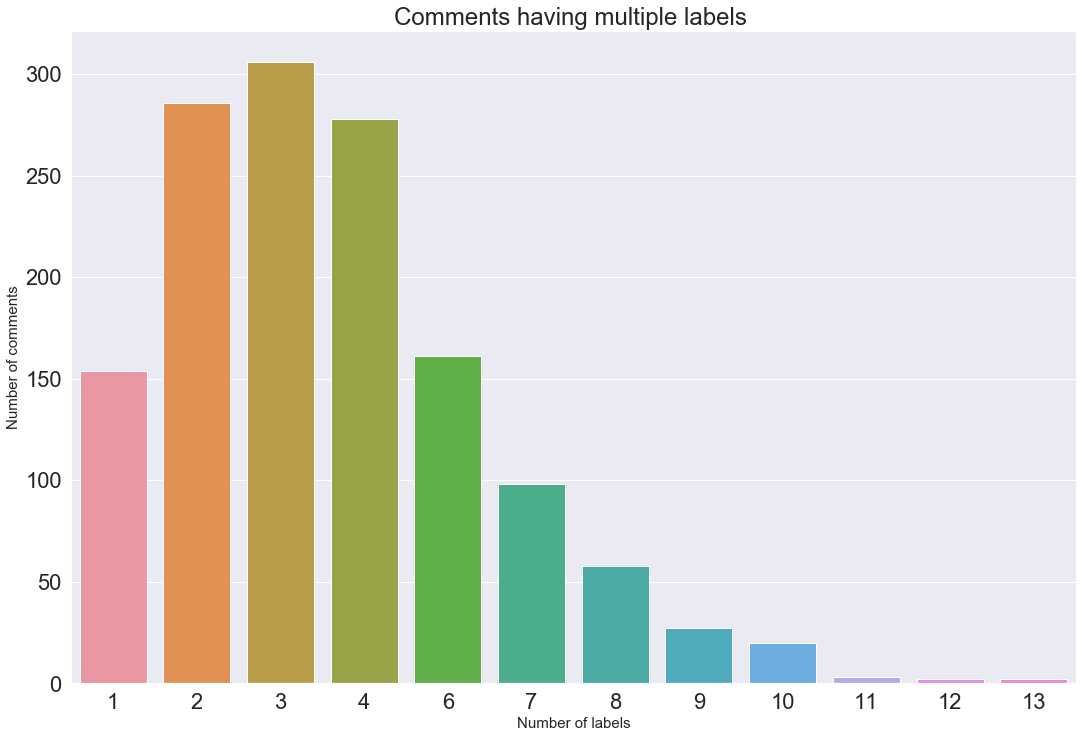

In [54]:
plot_multi_labels(data_classes)